In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('datasets/us_accidents_expanded.csv')

## Data Analysis

### Feature Distribution
We would like to analyze distributions for some of the features to get a general
idea of our classes.

#### Target Feature

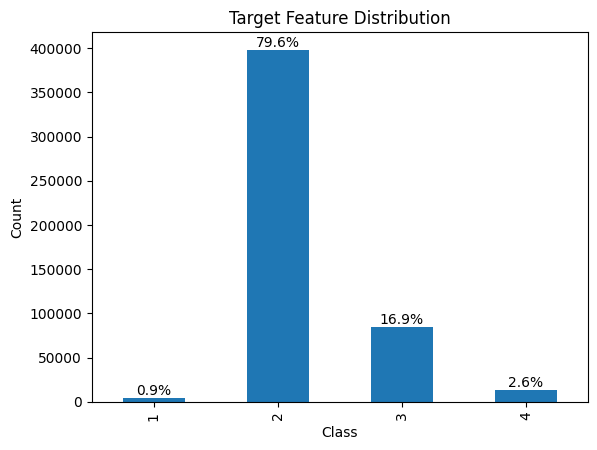

In [3]:
severity_counts = df['Severity'].value_counts().sort_index()
severity_percentage = severity_counts / df.shape[0] * 100

ax = severity_counts.plot(kind='bar')
for i, count in enumerate(severity_counts):
    ax.text(i, count + 5, f'{severity_percentage[i + 1]:.1f}%', ha='center', va='bottom')

plt.title('Target Feature Distribution')
plt.xlabel('Class')
plt.ylabel('Count');

Clearly there is an imbalance in the distribution for severity levels, with the vast majority of records being level `2`. We will need to keep that in mind when
we're training our ML models.

### Correlations
We can take a look at how each feature correlates with our target variable `Severity`.
To help with performance, we'll be splitting our features into several batches
and throw up a correlation matrix for each category.

#### 

In [4]:
df_corr = df.copy()


# drop timestamps
df_corr = df_corr.drop(columns=['Start_Datetime', 'End_Datetime', 'Weather_Timestamp', 'Start_Date', 'End_Date', 'Start_Time', 'End_Time', 'Elapsesd_Time'])
# todo, encode time numerically

# drop address information and description
df_corr = df_corr.drop(columns=['Description', 'Street', 'City', 'County', 'Zipcode'])

# one-hot encode airport code
df_corr = pd.get_dummies(df_corr, columns=['Airport_Code'])

# change day/night to true/false respectively
day_night = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df_corr[day_night] = df_corr[day_night].replace('Day', True)
df_corr[day_night] = df_corr[day_night].replace('Night', False)

# normalize numerical features
scaler = MinMaxScaler()
numeric_columns = df_corr.select_dtypes(include=['number']).columns
df_corr[numeric_columns] = scaler.fit_transform(df_corr[numeric_columns])

df_corr = df_corr.dropna()

df_corr.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Airport_Code_KY23,Airport_Code_KY50,Airport_Code_KY51,Airport_Code_KY63,Airport_Code_KY70,Airport_Code_KYIP,Airport_Code_KYKM,Airport_Code_KYNG,Airport_Code_KZPH,Airport_Code_KZZV
0,0.333333,0.248761,0.584845,0.248768,0.584845,0.000000,0.543539,0.543539,0.616162,0.777662,...,False,False,False,False,False,False,False,False,False,False
1,0.333333,0.590423,0.826094,0.590418,0.826108,0.000289,0.431180,0.424157,0.474747,0.777401,...,False,False,False,False,False,False,False,False,False,False
2,0.333333,0.413262,0.070240,0.413273,0.070246,0.000114,0.511938,0.511938,0.727273,0.774269,...,False,False,False,False,False,False,False,False,False,False
3,0.333333,0.782343,0.552575,0.782364,0.552945,0.005448,0.367978,0.325843,0.858586,0.740344,...,False,False,False,False,False,False,False,False,False,False
4,0.333333,0.443310,0.096683,0.443322,0.096669,0.000238,0.420646,0.420646,0.333333,0.773747,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# correlations = df_corr.corr()['Severity']
# print(correlations)

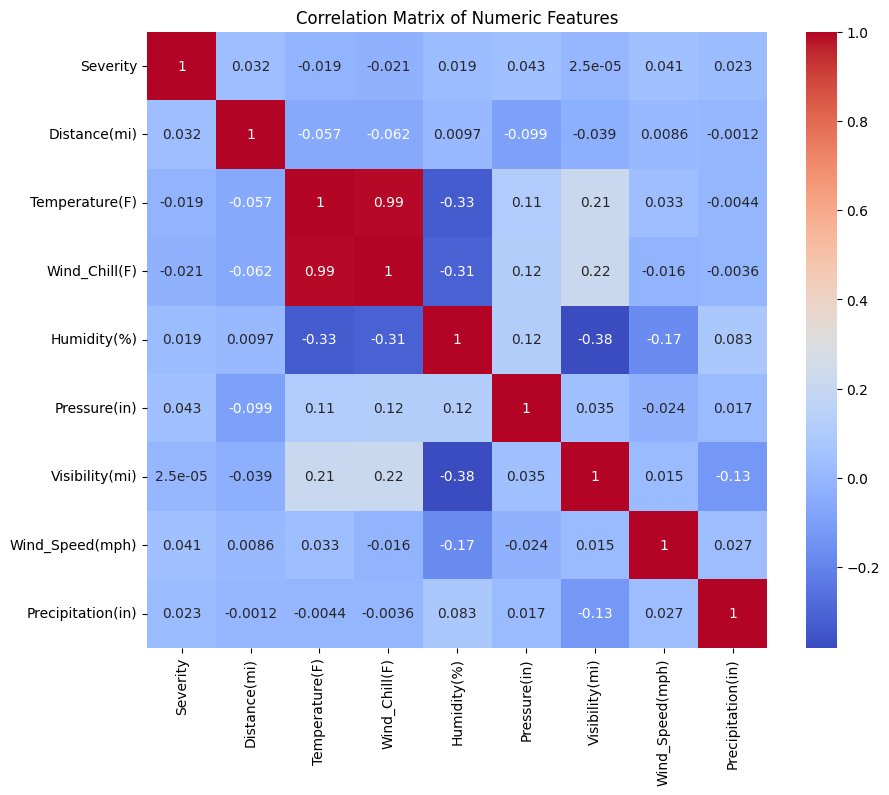

In [6]:
# Select only numeric columns for correlation
unfiltered_numeric_df = df.select_dtypes(include=[float, int])
numeric_df = unfiltered_numeric_df.drop(['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng'], axis=1) #removing unwanted numerical features

corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [7]:
unfiltered_numeric_df 

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,2,30.641211,-91.153481,30.641211,-91.153481,0.000,77.0,77.0,62.0,29.92,10.0,5.0,0.00
1,2,38.990562,-77.399070,38.990037,-77.398282,0.056,45.0,43.0,48.0,29.91,10.0,5.0,0.00
2,2,34.661189,-120.492822,34.661189,-120.492442,0.022,68.0,68.0,73.0,29.79,10.0,13.0,0.00
3,2,43.680592,-92.993317,43.680574,-92.972223,1.054,27.0,15.0,86.0,28.49,10.0,15.0,0.00
4,2,35.395484,-118.985176,35.395476,-118.985995,0.046,42.0,42.0,34.0,29.77,10.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2,45.522510,-123.084104,45.520225,-123.084211,0.158,40.0,32.0,77.0,29.55,10.0,15.0,0.01
499996,2,26.702570,-80.111169,26.703141,-80.111133,0.040,78.0,78.0,87.0,29.94,10.0,13.0,0.01
499997,2,34.561862,-112.259620,34.566822,-112.267150,0.549,52.0,52.0,12.0,24.94,10.0,12.0,0.00
499998,3,38.406680,-78.619310,38.406680,-78.619310,0.000,82.0,82.0,38.0,28.70,10.0,14.0,0.00


In [8]:
def calculate_elapsed_time(start_times, end_times, time_format='%Y-%m-%d %H:%M:%S'):
    elapsed_times = []
    for start, end in zip(start_times, end_times):
        try:
            start_dt = datetime.strptime(start, time_format)
            end_dt = datetime.strptime(end, time_format)
            elapsed_time = (end_dt - start_dt).total_seconds() / 60  # Convert to minutes
            elapsed_times.append(elapsed_time)
        except Exception as e:
            elapsed_times.append(None) 
    return pd.Series(elapsed_times)


if 'Start_Datetime' in df.columns and 'End_Datetime' in df.columns:
    df['Elapsed_Time'] = calculate_elapsed_time(df['Start_Datetime'], df['End_Datetime'])
else:
    print("Error: 'Start_Datetime' or 'End_Datetime' column is missing in the DataFrame.")


In [9]:
print(df[['Start_Datetime', 'End_Datetime', 'Elapsed_Time']].head())

        Start_Datetime         End_Datetime  Elapsed_Time
0  2019-06-12 10:10:56  2019-06-12 10:55:58     45.033333
1  2022-12-03 23:37:14  2022-12-04 01:56:53    139.650000
2  2022-08-20 13:13:00  2022-08-20 15:22:45    129.750000
3  2022-02-21 17:43:04  2022-02-21 19:43:23    120.316667
4  2020-12-04 01:46:00  2020-12-04 04:13:09    147.150000
